# Метрические методы

In [57]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [58]:
import sklearn
import sklearn as skl
import pandas as pd
import numpy as np
from sklearn import neighbors as nb
import numpy as np
import matplotlib as plt
from  utility import plot_predictions_2D
from sklearn.model_selection import train_test_split
random_state=0

In [3]:
np.set_printoptions(linewidth=140,edgeitems=10)
rcParams['figure.figsize'] = (8.0, 5.0)

## Классификация

### Метод ближайшего центроида


Для реализации метода ближайших центроидов используем класс:

*class sklearn.neighbors.**NearestCentroid**(metric='euclidean', *, shrink_threshold=None)*

- Допустимые значения параметра **metric** смотрим в sklearn.metrics.pairwise_distances
    (будем использовать их для всех мтрических методов):

   From scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘manhattan’].

   From scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’] 


- **shrink_threshold** - устанавливаем в 0 значения признаков, при делении которых на внутриклассовую дисперсию значение меньше порога 

Метод страдает от невыпуклых классов,
если классы имеют резко разные дисперсии

<img src="images/metrics.png" width="300" height="300" />




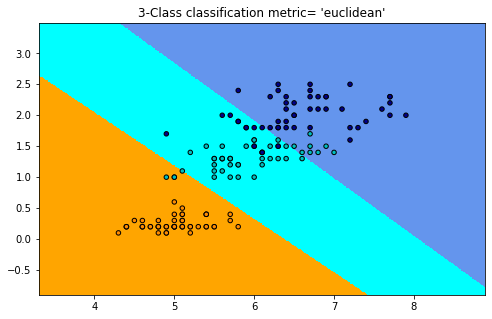

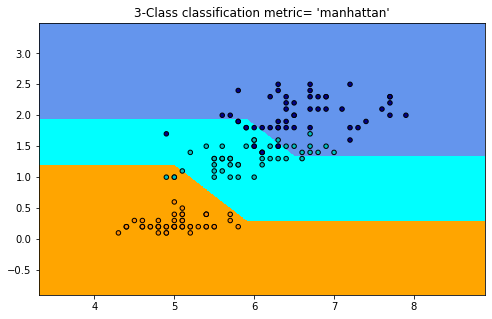

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

n_neighbors = 15

# импорт датасета с сортами ирисов
iris = datasets.load_iris()
# возьмем только 2 признака
X = iris.data[:, [0,3]]
y = iris.target

h = .01  # шаг прорисовки

# задаем цвета классов
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for metrics in ['euclidean','manhattan']:
    # настраиваем метод центроидов
    clf = NearestCentroid(metric=metrics)
    clf.fit(X, y)
    y_pred = clf.predict(X)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Отрисовка разделения пространства на классы
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
    plt.title("3-Class classification metric= %r" %metrics)
    plt.axis('tight')

    plt.show()

### K-NN. Классификация

### Разделение на обучающую и тестовую выборку,  вычисление точности метода

<img src="images/grid_search_workflow.png" width="400" height="400" />

#### Для разделения выборки на обучающую и тестовую используем:

sklearn.model_selection.**train_test_split**(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

- возвращает список подмассивов, включающий обучение и контроль
- test_size,train_size - обычно указыват один из параметров в виде доли от всего семпла

#### Для вычисления точности классификации применяем

sklearn.metrics.**accuracy_score**(y_true, y_pred, *, normalize=True, sample_weight=None)

- y_true - массив значений классов для объектов тестовой выборки 
- y_pred - массив предсказанных моделью классов для объектов тестовой выборки
- возвращает долю правильно отклассифицированных объетов (при normalize=True) или количество таких объектов (normalize=False)


### Посмотрим на точность классификации при разных K
#### Генерируем модельные классы в форме полумесяцев

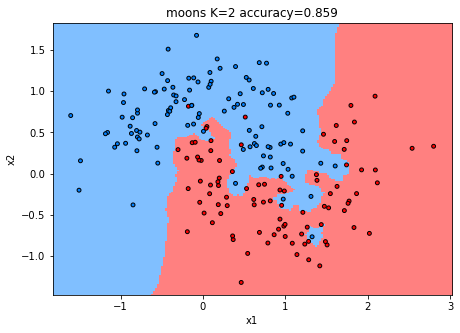

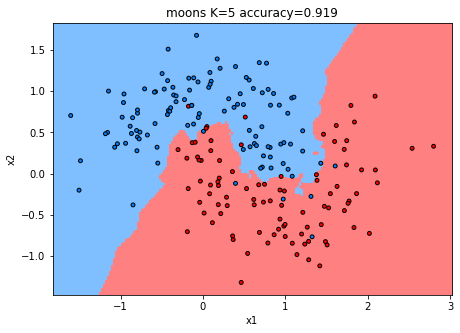

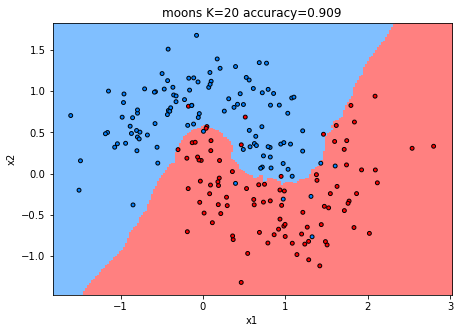

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
random_state=0
num_samples = 300
X, y =datasets.make_moons(noise=0.3, random_state=random_state, n_samples=num_samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
    
for n in [2,5,20]:

    knn_model=nb.KNeighborsClassifier(n_neighbors=n)
   
    knn_model.fit(X_train,y_train)
    Y_predicted = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test,Y_predicted)
    
    plot_predictions_2D(
        knn_model, X_train, y_train, task='classification', n=200, cmap=cm.ocean, feature_names=['x1','x2'],alpha=0.5)
    title('moons K=%d accuracy=%.3f'%(n,accuracy))

#### При K=5 точность лучше всего


### Теперь попробуем менять p, при фиксированном числе K=5

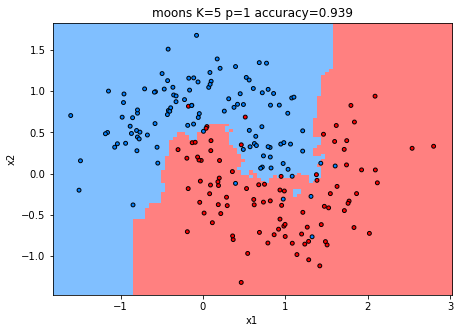

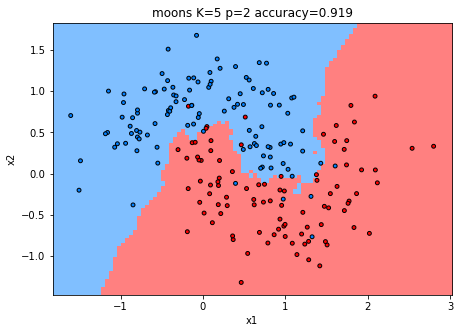

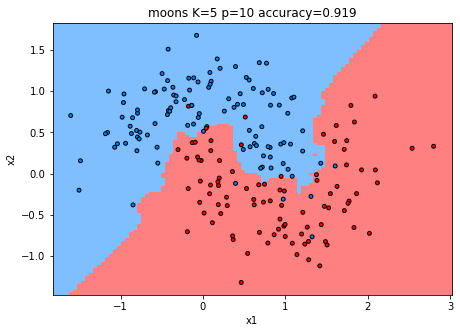

In [6]:
num_neigh=5
for p_metr in [1,2,10]:
    knn_model=nb.KNeighborsClassifier(n_neighbors=num_neigh,p=p_metr)
   
    knn_model.fit(X_train,y_train)
    Y_predicted = knn_model.predict(X_test)
    accuracy = accuracy_score(Y_predicted,y_test)
    plot_predictions_2D(
        knn_model, X_train, y_train, task='classification', n=100, cmap=cm.ocean, feature_names=['x1','x2'],alpha=0.5)
    title('moons K=%d p=%d accuracy=%.3f'%(num_neigh,p_metr,accuracy))    

#### Среди наших вариантов лучше всего показала себя метрика миньковского при p=1, что эквивалентно метрике 'manhattan'


### Посмотрим, как KNN будет разделять вытянутые овальные классы

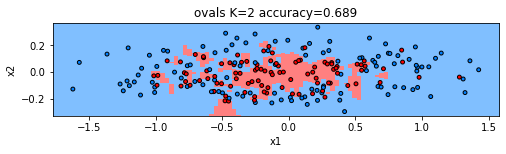

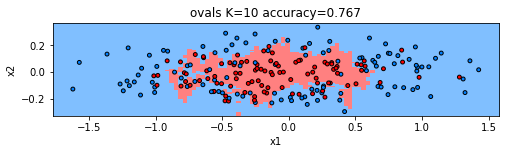

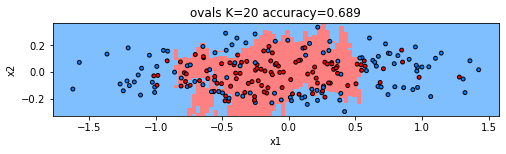

In [7]:
# сгенерируем сильно зашумленные круги
X, y = datasets.make_circles(n_samples=num_samples, factor=.5, noise=.3,random_state=random_state)
# сожмем по оси Х в овалы
X[:,1]=X[:,1]/5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

for n in [2,10,20]:
    knn_model=nb.KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train,y_train)
    Y_predicted = knn_model.predict(X_test)
    accuracy = accuracy_score(Y_predicted,y_test)
    
    plot_predictions_2D(
        knn_model, X_train, y_train, task='classification', n=100, cmap=cm.ocean, feature_names=['x1','x2'],alpha=0.5)
    title('ovals K=%d accuracy=%.3f'%(n,accuracy))   



При маленьких K - большая чувствительность к выбросам, 

при больших K алгоритм хуже разделяет классы

Поэтому для алгоритма KNN чаще всего нужно делать нормализацию признаков(если только сознательно не планируется занизить вес признака с меньшим спектром значений)

### Нормализация

Для нормализации вещественных признаков можно использовать

- **StandardScaler()**
- **MinMaxScaler()**

и другие классы из sklearn.preprocessing



### Нормализуем признаки в задаче с овальными классами:

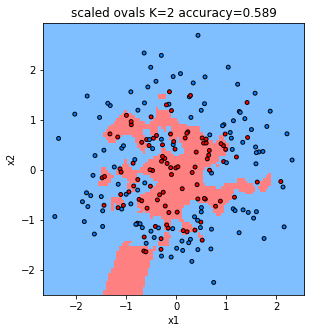

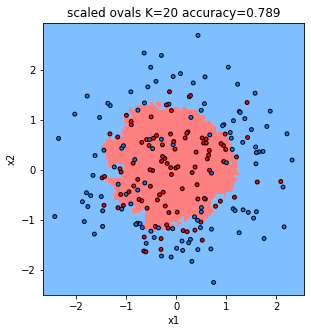

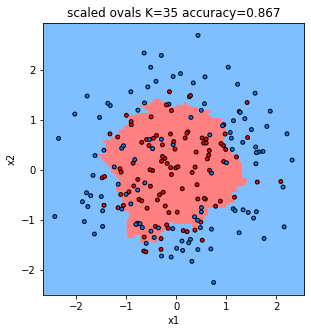

In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)
for n in [2,20,35]:
    knn_model=nb.KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train_norm,y_train)
    Y_predicted = knn_model.predict(X_test_norm)
    accuracy = accuracy_score(Y_predicted,y_test)
    plot_predictions_2D(
        knn_model, X_train_norm, y_train, task='classification', n=100, cmap=cm.ocean, feature_names=['x1','x2'],alpha=0.5)
    title('scaled ovals K=%d accuracy=%.3f'%(n,accuracy))

#### Нормализация улучшила точность прогноза c 0.767 до 0.867


## Поиск оптимальных значений парамеров модели

### Построим график зависимости ошибки прогноза от K:

0| 1| 2| 3| 4| 5| 6| 7| 8| 9| 10| 11| 12| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23| 24| 25| 26| 27| 28| 29| 30| 31| 32| 33| 34| 35| 36| 37| 38| 39| 40| 41| 42| 43| 44| 45| 46| 47| 48| 49| 51| 52| 53| 54| 55| 56| 57| 58| 59| 60| 61| 62| 63| 64| 65| 66| 67| 68| 69| 70| 71| 72| 73| 74| 75| 76| 77| 78| 79| 80| 81| 82| 83| 84| 85| 86| 87| 88| 89| 90| 91| 92| 93| 94| 95| 96| 97| 98| 99| 100.0| 
Min error_rate = 0.1556 for n_neighbors=19


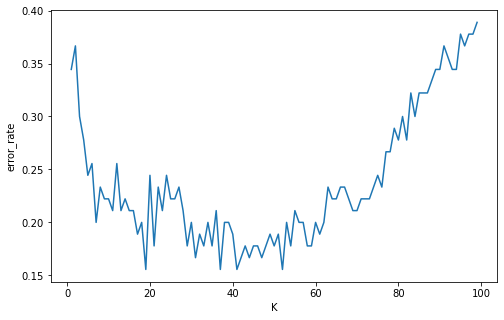

In [9]:
from utility import show_param_dependency
knn = nb.KNeighborsClassifier(p=1)
show_param_dependency(knn, X_train_norm, y_train, X_test_norm, y_test, param_name='n_neighbors', 
     
                      loss_fun='error_rate', param_vals=arange(1,100,1), x_label='K')

#### На графике  видно оптимальное окно выбора параметра K

## Кроссвалидация. GridSearchCV
<img src="images/grid_search_cross_validation.png" width="600" height="600" />

* Кроссвалидация по фолдам:

    class sklearn.model_selection.**cross_val_score**(estimator, X, y...)
    
 
* Для поиска по сетке параметров используем GridSearchCV:

    sklearn.model_selection.**GridSearchCV**(estimator, param_grid,...)



### Определим лучшие параметры KNN с помощью GridSearchCV в задаче классификации ирисов:

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=random_state)

knn = nb.KNeighborsClassifier()
param_grid = {'n_neighbors':[1,3,5,8,10,15,20], 'p':[1,2,4,6]}
grid_knn = GridSearchCV(knn, param_grid, n_jobs=-1, refit=True)
grid_knn.fit(x_train,y_train)
print(grid_knn.best_score_, grid_knn.best_params_)
# точность для тестовой выборки
y_predicted = grid_knn.predict(x_test)
accuracy = accuracy_score(y_test,y_predicted)
print("accuracy=%.3f" %accuracy)

0.97 {'n_neighbors': 5, 'p': 4}
accuracy=0.980


Есть задачи, для которых KNN очень хорошо работает

# Регрессия. K-NN. 

class sklearn.neighbors.**KNeighborsRegressor**(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'...)


Возьмем задачу предсказания стоимости жилья по параметрам.

Посчитаем качество KNN-регрессии по кроссвалидации на 3 фолдах для различных K:
(CV выводит средний коэффициент детерминации)

In [48]:
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import cross_val_score
boston = load_boston()
#print(boston.DESCR)

In [49]:
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [52]:
x = boston_df.iloc[:,:-1]
y = boston_df["Price"]

In [53]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=random_state)
for n in [2,5,10,15,20,35]:
    reg_knn =  nb.KNeighborsRegressor(n_neighbors=n,p=2)
    print(f'K={n}  {mean(cross_val_score(reg_knn, x_train, y_train, cv=3)):.3f} ')


K=2  0.474 
K=5  0.470 
K=10  0.373 
K=15  0.303 
K=20  0.272 
K=35  0.218 


In [54]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
for n in [2,5,10,15,20,35]:
    reg_knn =  nb.KNeighborsRegressor(n_neighbors=n,p=2)
    print(f'K={n}  mean CV={mean(cross_val_score(reg_knn, x_train, y_train, cv=3)):.3f} ')

K=2  mean CV=0.399 
K=5  mean CV=0.462 
K=10  mean CV=0.416 
K=15  mean CV=0.357 
K=20  mean CV=0.325 
K=35  mean CV=0.264 


 Определим наилучшие параметры, используя GridSearchCV, обратим внимание на важный параметр refit=True

In [55]:
from sklearn.model_selection import GridSearchCV

reg_knn = nb.KNeighborsRegressor()
param_grid = {'n_neighbors':[1,3,5,8,10,15,20,50], 'p':[1,2,4,6]}
grid_knn = GridSearchCV(reg_knn, param_grid, n_jobs=-1, refit=True)
grid_knn.fit(x_train,y_train)
print(grid_knn.best_score_, grid_knn.best_params_)
print(f'test_score={grid_knn.score(x_test,y_test)}')
print(mean_squared_error(grid_knn.predict(x_test),y_test))

0.5703614986887546 {'n_neighbors': 3, 'p': 1}
test_score=0.6117728803792082
31.299700598802396


## Pipeline
Процесс построения алгоритма машинного обучения от сырых данных до предсказания можно разделить на несколько этапов, например:

* Обработка/фильтрация данных
* Добавление новых признаков 
* ...
* Обучение алгоритма

Чтобы было удобнее, все этапы можно красиво объединить в один [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html):

 sklearn.pipeline.**Pipeline**(steps, *, memory=None, verbose=False)


    steps - список кортежей вида ('имя преобразования',преобразование/обучение модели)
    

Есть сокращенная форма записи:


 sklearn.pipeline.**make_pipeline**(*steps, memory=None, verbose=False)


    *steps - список, состоящий из последовательных шагов "преобразование/обучение модели", отличие make_pipeline от pipeline в том, что у первого имена генерируются автоматически, изменяя имя преобразователя/алгоритма обучения в нижний регистр




### Пример pipeline на датасете iris:
Настроим pipeline из двух шагов: 

1) Нормализуем признаки

2) Настроим KNN

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

iris = datasets.load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=random_state)


pipeline = Pipeline(steps = [
              ('scaler', StandardScaler())
 
              ,('KNN',KNeighborsClassifier())
           ])
 # define the pipeline object.
parameteres = {'KNN__n_neighbors':[1,2,5,10], 'KNN__p':[1,2,5]}

# инициализируем поиск наилучших параметров на данных,упакованных в pipeline
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
grid.fit(x_train, y_train)
#одной строкой выполним все преобразования на тестовыми данными и посчитаем оценку качества
print(grid.score(x_test,y_test))
print(grid.best_params_)


0.98
{'KNN__n_neighbors': 5, 'KNN__p': 1}


### Пример pipeline:
Настроим pipeline из двух шагов: 

1) Нормализуем признаки

2) Настроим KNN

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


pipeline = Pipeline(steps = [
              ('scaler', StandardScaler())
 
              ,('KNN',KNeighborsClassifier())
           ])
 # define the pipeline object.
parameteres = {'KNN__n_neighbors':[1,2,5,7,10], 'KNN__p':[1,2,5]}

# инициализируем поиск наилучших параметров на данных,упакованных в pipeline
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5,refit=True)
grid.fit(x_train, y_train)

print(grid.best_params_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'KNN__n_neighbors': 2, 'KNN__p': 2}


# Регрессия Надарая-Ватсона

Сгенерируем модельные данные: зашумленный sin(x)

In [15]:
# Generate sample data
import numpy as np
random_state=12
np.random.seed(12)
X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
np.random.seed(12)
y += 0.5 * (0.5 - np.random.rand(y.size))

###### Используем реализацию из https://github.com/jmetzen/kernel_regression:
класс KernelRegression(kernel=, gamma=)
- kernel: 'rbf','chi2','laplacian'
- gamma - параметр распределений, определяет ширину окна в методе, тип данных: список, оптимальное значение выбирается методом Leave-one-out
- прогноз только local-constant
- сетка для оптимизации параметра gamma задается сразу в объекте класса
- стандартный синтаксис методов fit(),predict()
- атрибут этого класс gamma содержит наилучшее значение gamma,оптимизированного методом Leave-one-out

<img src="images/kernels.jpg" width="400" height="400" />

In [16]:
from kernel_regression import KernelRegression
#local constant with auto bandwidth using leave-one-out 
from sklearn.metrics import mean_squared_error

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_state)

#### Запустим регрессию с Гауссовым ядром(эквивалент RBF) и фиксированной шириной окна

In [18]:
#параметр gamma определяет ширину окна
kr = KernelRegression(kernel="rbf", gamma=[0.5])
y_kr = kr.fit(x_train, y_train).predict(x_test)
accuracy=mean_squared_error(y_test,y_kr)
print(f'RBF accuracy={accuracy:.3f}')
print(f'best gamma={kr.gamma:.3f}')

RBF accuracy=0.097
best gamma=0.500


#### Сравним предсказания модели при разной ширине окна. Overfitting и underfitting

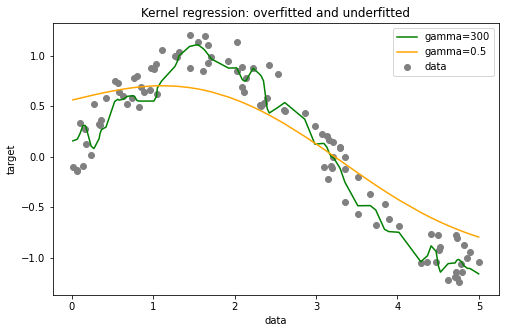

In [19]:
plt.scatter(x_test, y_test, c='grey', label='data')


kr2 = KernelRegression(kernel="rbf", gamma=[300])
y_kr2 = kr2.fit(x_train, y_train).predict(x_test)

list_xy_rbf2=zip(*sorted(zip(x_test,y_kr2)))

kr3 = KernelRegression(kernel="rbf", gamma=[0.5])
y_kr3 = kr3.fit(x_train, y_train).predict(x_test)

list_xy_rbf3=zip(*sorted(zip(x_test,y_kr3)))

plt.plot(*list_xy_rbf2, c='g', label=('gamma='+str(kr2.gamma)))
plt.plot(*list_xy_rbf3, c='orange', label=('gamma='+str(kr3.gamma)))
plt.xlabel('data')
plt.ylabel('target')
plt.title('Kernel regression: overfitted and underfitted')
plt.legend()

#### Подберем оптимальную ширину окна 
оптимизация в методе KernelRegression идет по заданной сетке значений параметра gamma методом leave-one-out

In [20]:
# задаем логарифмическую сетку параметра gamma 
kr = KernelRegression(kernel="rbf", gamma=np.logspace(-2, 2, 60))
# обучаем модель и получаем прогнозы на тестовой выборке
y_kr = kr.fit(x_train, y_train).predict(x_test)
# посчитаем MSE 
accuracy=mean_squared_error(y_test,y_kr)
print(f'RBF with optimized gamma accuracy={accuracy:.3f}')
# выводим оптимальный параметр gamma
print(f'best gamma={kr.gamma:.3f}')

RBF with optimized gamma accuracy=0.028
best gamma=7.038


#### Сравним прогнозы на разных ядрах с оптимизацией ширины окна

Laplacian accuracy=0.027
Chi2 accuracy=0.026
RBF accuracy=0.027


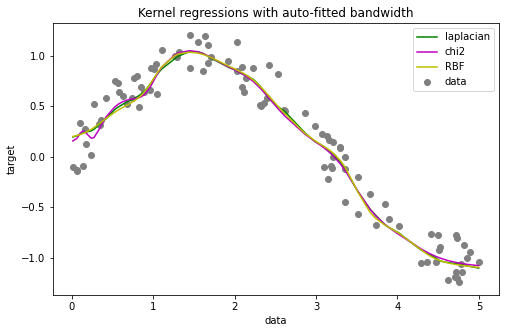

In [21]:
#Отобразим наилучшую(оптимизированную по сетке значений возможной ширины окна методом leave-one-out) модель
#  с ядром Laplacian 
kr = KernelRegression(kernel="laplacian", gamma=np.logspace(-2, 2, 20))
y_kr = kr.fit(x_train, y_train).predict(x_test)
accuracy=mean_squared_error(y_test,y_kr)
print(f'Laplacian accuracy={accuracy:.3f}')
#print(f'Laplacian gamma={kr.gamma:.3f}')
list_xy=zip(*sorted(zip(x_test,y_kr)))
plt.plot(*list_xy, c='g', label='laplacian')

#-- с ядром Chi2 
kr = KernelRegression(kernel="chi2", gamma=np.logspace(-2, 2, 20))
y_kr = kr.fit(x_train, y_train).predict(x_test)
accuracy=mean_squared_error(y_test,y_kr)
print(f'Chi2 accuracy={accuracy:.3f}')
#print(f'Chi gamma={kr.gamma:.3f}')
list_xy=zip(*sorted(zip(x_test,y_kr)))
plt.plot(*list_xy, c='m', label='chi2')

#-- с ядром rbf 
kr = KernelRegression(kernel="rbf", gamma=np.logspace(-2, 2, 20))
y_kr = kr.fit(x_train, y_train).predict(x_test)
accuracy=mean_squared_error(y_test,y_kr)
print(f'RBF accuracy={accuracy:.3f}')
#print(f'RBF gamma={kr.gamma:.3f}')
list_xy=zip(*sorted(zip(x_test,y_kr)))
plt.plot(*list_xy, c='y', label='RBF')

#отобразим тестовые точки и предсказания модели
plt.scatter(x_test, y_test, c='grey', label='data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Kernel regressions with auto-fitted bandwidth')
plt.legend()

#### На графике видно,что прогнозы на различных ядрах отличаются незначительно. 
#### Намного большее значение имеет параметр ширины окна.

### Другая библиотека для реализации регрессии Nadaraya-Watson:
statsmodels.nonparametric.kernel_regression
- похожа по функционалу, из популярных есть только ядра 'chi2' и 'gaussian'
- есть возможность выбора local linear и constant linear аппроксимации ('ll', 'lc')
- bw - параметр ширины окна, 'cv_ls' -cross validation leave-one-out

In [22]:
from statsmodels.nonparametric.kernel_regression import KernelReg

kerreg=KernelReg( y_train,x_train,'c', reg_type='ll', bw='cv_ls', ckertype='gaussian')

y_pred,y_mfx=kerreg.fit(data_predict=x_test)
accuracy=mean_squared_error(y_test,y_pred)
print(f'LL accuracy={accuracy:.3f}')
#print(kerreg.bw)
list_xy_ll=zip(*sorted(zip(x_test,y_pred)))


LL accuracy=0.026


LC accuracy=0.028


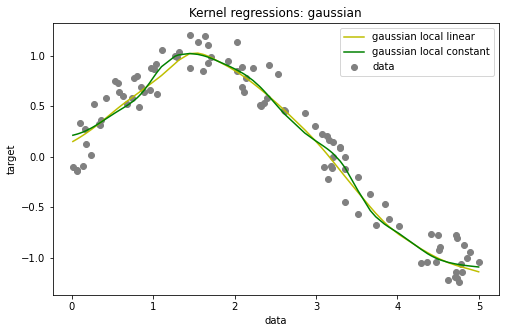

In [23]:
kerreg=KernelReg( y_train,x_train,'c', reg_type='lc', bw='cv_ls', ckertype='gaussian')

y_pred,y_mfx=kerreg.fit(data_predict=x_test)
accuracy=mean_squared_error(y_test,y_pred)
print(f'LC accuracy={accuracy:.3f}')
#print(kerreg.bw)
list_xy_lc=zip(*sorted(zip(x_test,y_pred)))

plt.plot(*list_xy_ll, c='y', label='gaussian local linear')
plt.plot(*list_xy_lc, c='g', label='gaussian local constant')
plt.scatter(x_test, y_test, c='grey', label='data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Kernel regressions: gaussian')
plt.legend()


#### Качество на local linear модели немного лучше, чем на local constant